In [144]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
%matplotlib inline

### 1) Исходные данные

In [145]:
np.random.seed(123)
n = 300
X = np.random.uniform(5, 15, n)
Y = np.random.normal(10, 5, n)
m_x, std_x = 10, 8.333
m_y, std_y = 10, 5

mean_x, s_x = np.mean(X), np.var(X, ddof=1)
mean_y, s_y = np.mean(Y), np.var(Y, ddof=1)
mean_x, s_x, mean_y, s_y

(9.984032046008716, 7.975471722372793, 9.77048270173827, 24.250839809445775)

In [146]:
#кк Пирсона
print(pearsonr(X, Y))

#кк Спирмена
print(spearmanr(X, Y))

#кк Кендалла
print(kendalltau(X, Y))

PearsonRResult(statistic=0.02057550277629708, pvalue=0.72264354857295)
SignificanceResult(statistic=0.02249713885709841, pvalue=0.6979536597085495)
SignificanceResult(statistic=0.01560758082497213, pvalue=0.6868421683776875)


### 2) Визуальное представление двумерной выборки

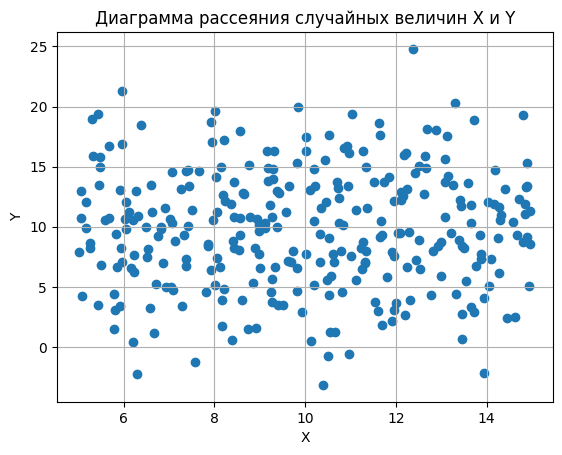

In [147]:
plt.title('Диаграмма рассеяния случайных величин X и Y')
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

### 3) Проверка независимости методом таблиц сопряженности

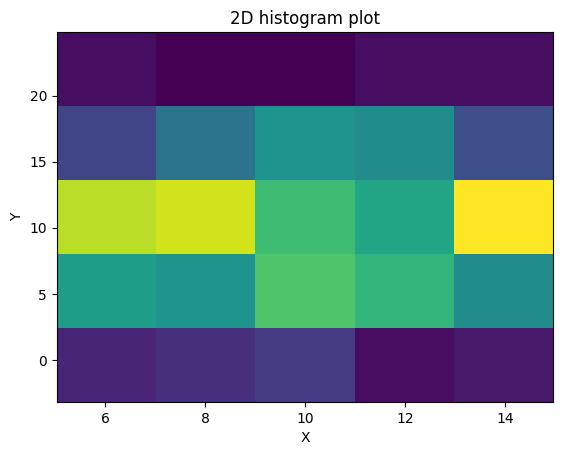

In [148]:
# 5 bins
freq, X_interval, Y_interval, _ = plt.hist2d(X, Y, bins=5)
plt.title('2D histogram plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [149]:
freq, X_interval, Y_interval

(array([[ 4., 17., 27.,  7.,  2.],
        [ 5., 16., 28., 12.,  1.],
        [ 6., 22., 21., 16.,  1.],
        [ 2., 20., 18., 15.,  2.],
        [ 3., 15., 30.,  8.,  2.]]),
 array([ 5.02688065,  7.01367717,  9.0004737 , 10.98727022, 12.97406675,
        14.96086327]),
 array([-3.15719018,  2.4328733 ,  8.02293678, 13.61300026, 19.20306375,
        24.79312723]))

In [150]:
from scipy.stats import chi2_contingency

# для 5 интервалов
chi2_contingency(freq)

Chi2ContingencyResult(statistic=13.917002768156035, pvalue=0.6048969903635774, dof=16, expected_freq=array([[ 3.8       , 17.1       , 23.56      , 11.02      ,  1.52      ],
       [ 4.13333333, 18.6       , 25.62666667, 11.98666667,  1.65333333],
       [ 4.4       , 19.8       , 27.28      , 12.76      ,  1.76      ],
       [ 3.8       , 17.1       , 23.56      , 11.02      ,  1.52      ],
       [ 3.86666667, 17.4       , 23.97333333, 11.21333333,  1.54666667]]))

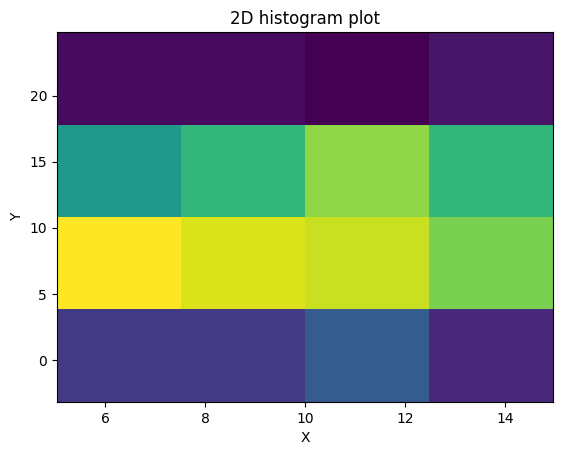

Chi2ContingencyResult(statistic=3.709580343385543, pvalue=0.9294670879865208, dof=9, expected_freq=array([[ 9.24666667, 34.06666667, 25.79333333,  3.89333333],
       [ 9.5       , 35.        , 26.5       ,  4.        ],
       [10.51333333, 38.73333333, 29.32666667,  4.42666667],
       [ 8.74      , 32.2       , 24.38      ,  3.68      ]]))

In [151]:
#4 bins
freq, X_interval, Y_interval, _ = plt.hist2d(X, Y, bins=4);
plt.title('2D histogram plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
# для 4 интервалов
chi2_contingency(freq)
# Можем заметить, что если убрать теоретические частоты < 5, уверенность в независимости X и Y возрастет

In [157]:
'''
# Теоретические частоты
m = np.zeros((5, 5))
z = 0
for i in range(5):
    for j in range(5):
        m[i, j] = np.sum(freq[i,:])*np.sum(freq[:,j])/n
        z  += ((freq[i, j] - m[i, j])**2)/m[i, j]
print(z)
''';

### 4) Исследование корреляционной связи
Случайная величина U = λX + (1–λ)Y,         λ∈[0; 1]

Случайная величина V = λX^3 + (1–λ)Y^3,     λ∈[0;1]

In [253]:
a = np.linspace(0, 1, 200)

#lambda
param = 0

In [254]:
pU, sU, kU = [], [], []
pV, sV, kV = [], [], []

for param in a:
    U = param*X + (1 - param)*Y
    V = param*(X**3) + (1 - param)*(Y**3)
    pV.append(pearsonr(X, V)[0])
    sV.append(spearmanr(X, V)[0])
    kV.append(kendalltau(X, V)[0])

    pU.append(pearsonr(X, U)[0])
    sU.append(spearmanr(X, U)[0])
    kU.append(kendalltau(X, U)[0])

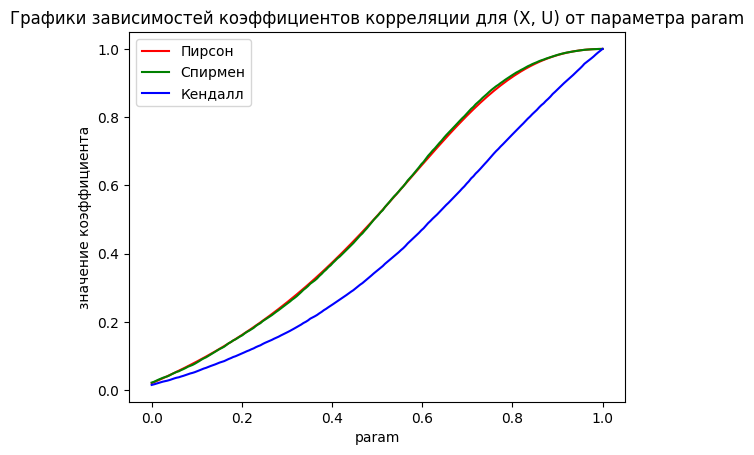

In [256]:
a = np.linspace(0, 1, 200)
plt.title("Графики зависимостей коэффициентов корреляции для (X, U) от параметра param")
plt.plot(a, pU, c='r', label="Пирсон")
plt.plot(a, sU, c='g', label="Спирмен")
plt.plot(a, kU, c='b', label="Кендалл")
plt.xlabel("param")
plt.ylabel("значение коэффициента");
plt.legend();

X имеет равномерное распределение, а Y - нормальное. При увеличении параметра влияние шума(в данном случае Y) будет уменьшаться, а зависимость будет стремиться к линейной. Поэтому коэффициенты корреляции будут стремиться к 1. Пирсона = Спирмен, т.к. монотонная функция:

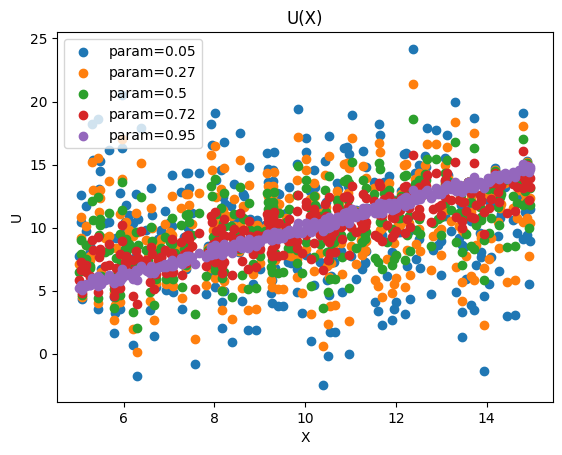

In [267]:
a = np.linspace(0.05, 0.95, 5)
plt.title('U(X)')
for param in a:
    U = param*X + (1 - param)*Y
    plt.scatter(X, U, label=f"param={round(param, 2)}")
    plt.xlabel("X")
    plt.ylabel("U");
    plt.legend()

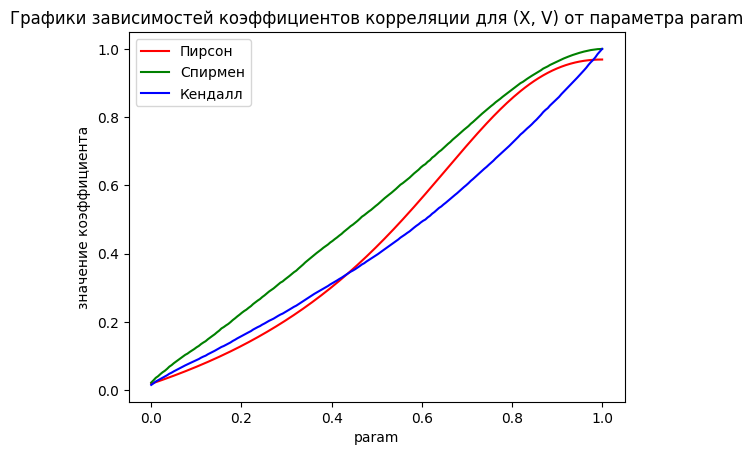

In [255]:
plt.title("Графики зависимостей коэффициентов корреляции для (X, V) от параметра param")
plt.plot(a, pV, c='r', label="Пирсон")
plt.plot(a, sV, c='g', label="Спирмен")
plt.plot(a, kV, c='b', label="Кендалл")
plt.xlabel("param")
plt.ylabel("значение коэффициента");
plt.legend();

Аналогичная ситуация с V. Однако, к.Пирсона уже не равен Спирмену. Ранговые коэффициенты остались без изменений, т.к. зависимость монотонная.А к. Пирсона немного просел, однако за счет очень быстрого роста на участке [5, 15] функция остается похожа на линейную. Это можно легко показать:
тангенс угла наклона: k = 3x^2 (это производная x^3),
тогда угол наклона = artan(k) при больших k мало изменяется, а значит угол можно принять за const. Таким образом, мы можем аппроксимировать нашу функцию линейной и получить высокий коэффициент корреляции Пирсона при param = 1.


<ipython-input-287-5bf635b7d3e7>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2*param + 1)


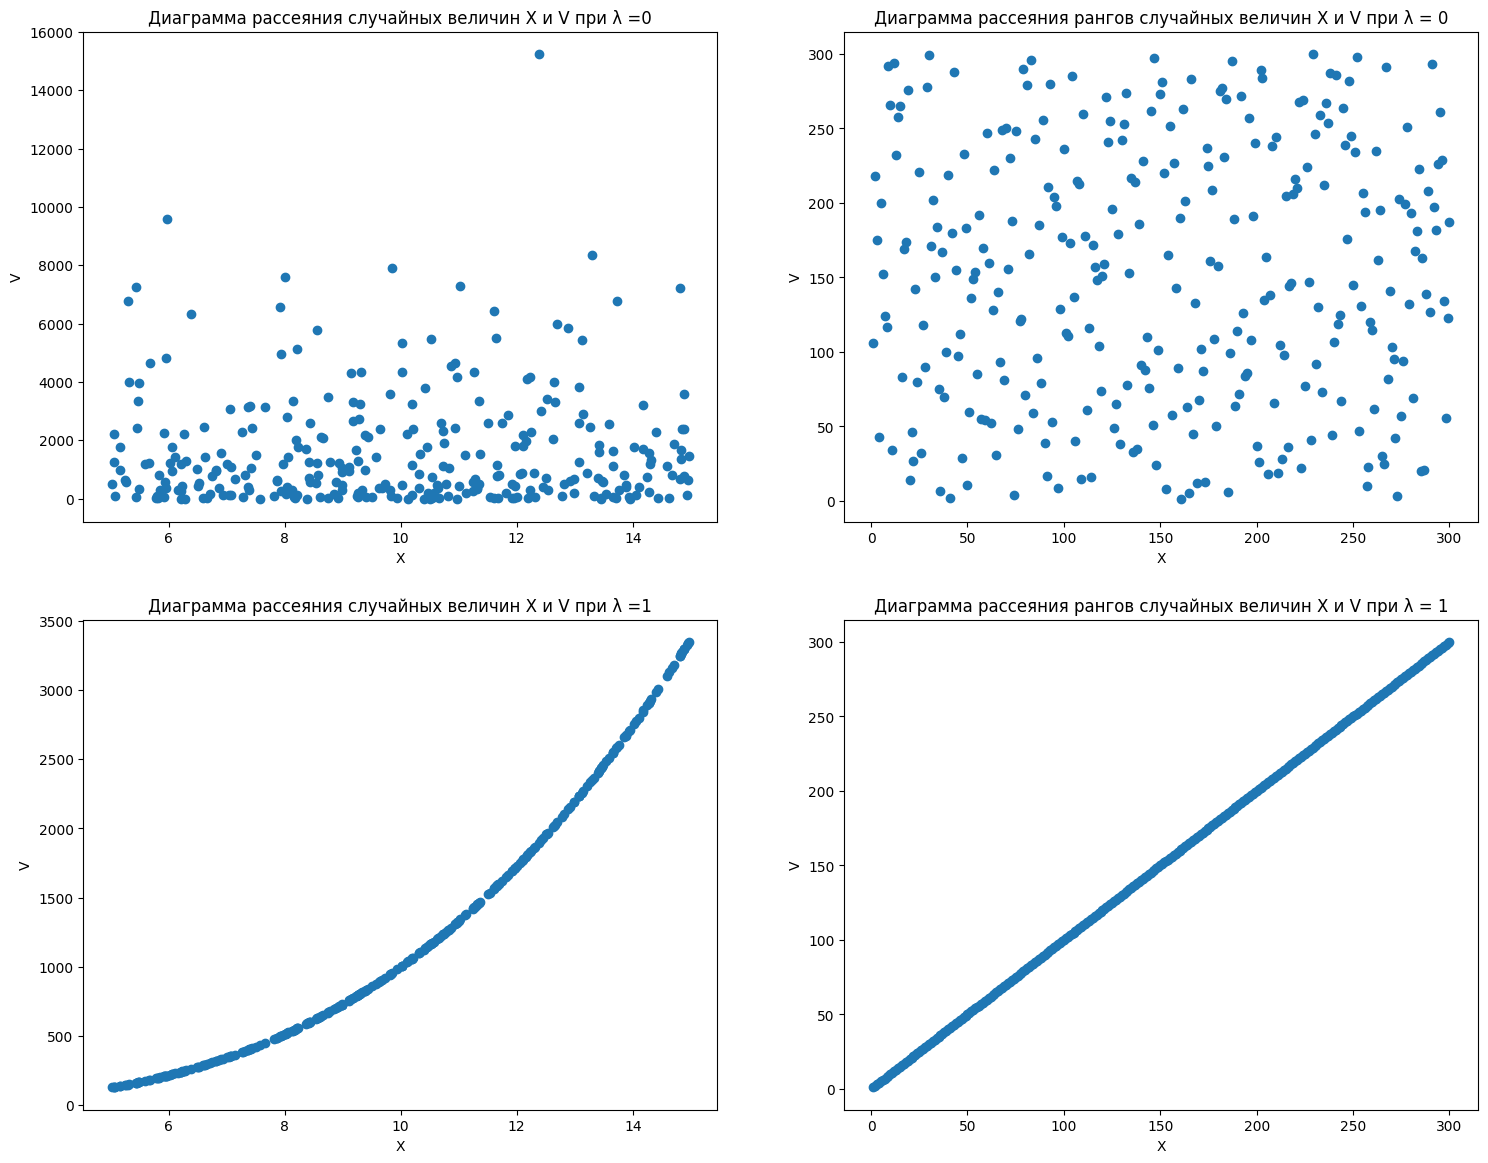

In [287]:
from scipy.stats import rankdata
plt.subplots(figsize = (18, 14))
for param in [0, 1]:
    V = param*(X**3) + (1 - param)*(Y**3)
    rang_V = rankdata(V, method='min')
    rang_X = rankdata(X, method='min')
    plt.subplot(2, 2, 2*param + 1)
    plt.title(f'Диаграмма рассеяния случайных величин X и V при λ ={param}')
    plt.xlabel('X')
    plt.ylabel('V')
    plt.scatter(X, V)
    plt.subplot(2, 2, 2*param + 2)
    plt.title(f'Диаграмма рассеяния рангов случайных величин X и V при λ = {param}')
    plt.xlabel('X')
    plt.ylabel('V')
    plt.scatter(rang_X, rang_V)

При param = 0 точки разбросаны случайно - между св нет линейной корреляции(было показано выше с помощью тестов). При param = 1, мы можем наблюдать зависимость. V = X^3 равномерно(т.к. X - равномерно, шумов нет). Диаграмма рассеяния рангов показала линейную зависимость - т.к между СВ X и Y - монотонная функциональная связь.